# README:<br>

Esse notebook foi criado por PhD. Junior A. Koch e PhD. Luana B. Peres como curso introdutório de Machine Learning para doutorandos em Bioinformática na Universidade Federal de Santa Catarina durante a primavera de 2018.<br>

English: This notebook was made by PhD. Junior A. Koch and PhD. Luana B. Peres as a Machine Learning introduction course for Bioinformatics PhD candidates at Universidade Federal de Santa Catarina on spring of 2018.

# Conteúdo
-  Este notebook possui um dos exemplos básicos utilizados no curso mencionado acima, não há ainda a intenção de aprofundamento em conceitos técnicos.

-  English: This notebook has one of the first basic examples used in the mentioned course, there is no intention for now to get deeper in technical concepts.

# Classificação<a id='Classificação'></a>

## Temos que classificar

Para entendermos como funciona um algoritmo de classificação vamos usar um exemplo bem simples:

Um pesquisador foi a campo coletar dados sobre dois pokemons, Pichu e Pikachu. Este pesquisador determinou que as características mais relevantes para classificar entre um dos dois são o comprimento da cauda e a largura das orelhas.

|Pichu                                  | Pikachu                                    |
|:-------------------------------------:|:------------------------------------------:|
|![alt text](images/pichu.png "Pichu")| ![alt text](images/pikachu.png "Pikachu")|

Os dados que ele coletou estão salvos no arquivo abaixo.

In [100]:
import numpy as np    # biblioteca científica
import pandas as pd   # biblioteca para visualização e manipulação de dados
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# pokemon dataset
pokemon = pd.read_csv(r".\datasets\outros\pokemon.csv")
pokemon = pokemon.drop('Unnamed: 0',axis=1)
pokemon_test = pd.read_csv(r".\datasets\outros\pokemon_test.csv")
pokemon_test = pokemon_test.drop('Unnamed: 0',axis=1)

In [101]:
pokemon.head()

,Pokemon,Comprimento Cauda (cm),Largura Orelha (cm)
0,0,17.3,17.2
1,1,24.3,12.9
2,0,15.5,12.6
3,1,22.2,12.0
4,1,21.2,13.3


Na primeira coluna um valor '1' significa que os dados são de um Pikachu e consequentemente um valor '0' são de um Pichu. Vejamos um gráfico de distribuição das medidas identificando as duas classes.

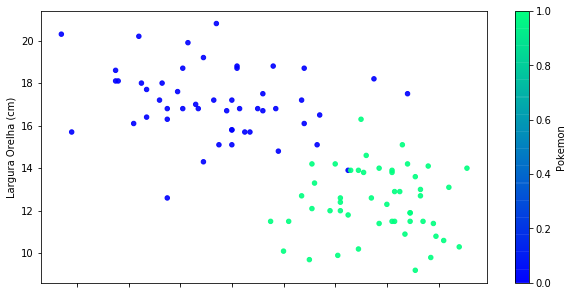

In [102]:
pokemon.plot(figsize=(10,5),kind="scatter", x="Comprimento Cauda (cm)", y="Largura Orelha (cm)", alpha=0.9,c='Pokemon',colormap='winter');

Se encontrarmos um jeito de automaticamente separar as duas categorias com um reta, por exemplo:

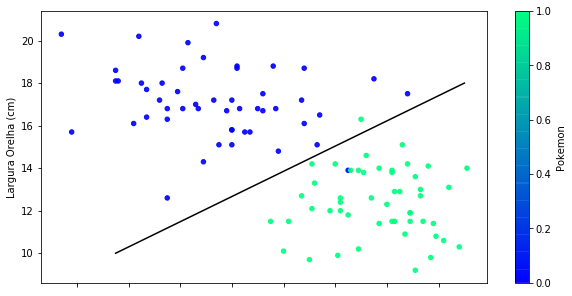

In [103]:
pokemon.plot(figsize=(10,5),kind="scatter", x="Comprimento Cauda (cm)", y="Largura Orelha (cm)", alpha=0.9,c='Pokemon',colormap='winter');
plt.plot([13.5,27],[10,18],'k');

Sabemos que os dados que corresponderem a pontos superiores a reta são de Pichu (0) e pontos inferiores a reta são de Pikachu (1).<br>
Claro que neste caso erraríamos ao analisar dois pontos, como você pode observar no gráfico, mas é um preço pequeno para poder automatizar este processo.<br>

A representação matemática da reta acima, $y = ax+b$, pode ser encontrada facilmente quando há apenas duas variáveis no nosso problema, entretanto problemas reais podem possuir milhares de variáveis. Para nós humanos isso se torna inviável.

Vamos então usar machine learning para descobrir qual é esta reta e quão perto ela chega de classificar corretamente estes pokemons. Para fins de comparação usaremos os algoritmos LogisticRegression e KNeighborsClassifer. Neste momento não vamos detalhar muito o que está sendo feito, pois este exemplo é mais ilustrativo, nas seções adiante nos aprofundaremos mais.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

poke_target = pokemon['Pokemon'].copy()
poke_data = pokemon.drop('Pokemon',axis=1)
poke_target_test = pokemon_test['Pokemon'].copy()
poke_data_test = pokemon_test.drop('Pokemon',axis=1)
knn = KNeighborsClassifier(n_neighbors=3)
log = LogisticRegression()

In [105]:
# treina o classificador com os dados
knn.fit(poke_data, poke_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Ainda não vamos entrar em detalhes do funcionamento específico deste algoritmo, apenas vamos dizer que ele verifica, para um determinado sample, os 3 samples mais próximos dele e analisa a classificação destes pontos.<br>

Com o treino feito vamos usar o que o algoritmo aprendeu e tentar prever o resultado de dados ainda desconhecidos, em 'pokemon_test'.

In [106]:
poke_predict = knn.predict(poke_data_test)
print('Previsto para os 10 primeiros samples:',poke_predict[:10])
print('Classe real dos 10 primeiros samples: ',poke_target_test.values[:10])

Previsto para os 10 primeiros samples: [0 0 0 1 0 1 1 0 1 0]
Classe real dos 10 primeiros samples:  [0 0 0 1 0 0 1 0 1 0]


Vemos que para estes dados houve apenas um erro onde foi previsto um Pikachu, mas na verdade era um Pichu.

In [107]:
# Verificando a acurácia média
poke_score = knn.score(poke_data_test,poke_target_test)
print(poke_score)

0.98


Este valor quer dizer que 98% das previsões estavam corretas, mas a acurácia não é uma métrica definitiva. Vamos verificar a matriz de confusão (confusion matrix).

Confusion matrix, without normalization


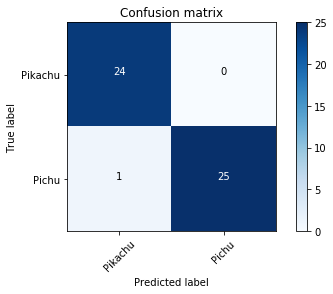

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(poke_predict,poke_target_test)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm, ['Pikachu','Pichu'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)    

Vejamos o signicado dos números na matriz de confusão:

![alt text](images/confusion_matrix.png "Confusion Matrix")

A confusion matrix é uma maneira melhor de compreender os resultados da previsão. No nosso caso a classe positiva é 1, ou Pikachu e a classe negativa é 0, Pichu. Então temos
-  TP - prevemos 24 samples pertencendo a classe de valor 1 (Pikachu) e acertamos;
-  FN - prevemos 0 samples pertencendo a classe de valor 0 (Pichu) e erramos;
-  FP - prevemos 1 sample pertencendo a classe de valor 1 (Pikachu) e erramos;
-  TN - prevemos 25 samples pertencendo a classe de valor 0 (Pichu) e acertamos.

Ou seja, o único erro foi proveniente de uma amostra na qual o algoritmo identificou como sendo um Pikachu, mas na verdade era um Pichu. Um caso ideal é composto apenas por valores na diagonal principal da matriz, ou seja, $FP$ e $FN$ nulos.

Para treinar o algoritmo acima utilizamos um parâmetro chamado 'n_neighbors' (número de primeiros vizinhos) igual a três. Cada algoritmo possui seus próprios parâmetros e a compreenssão dos mesmos é necessária para entender o que está ocorrendo e para encontrar o melhor modelo possível. Vamos agora verificar a chamada fronteira de decisão encontrada pelo KNeighborsClassifier com 1 e 3 vizinhos.

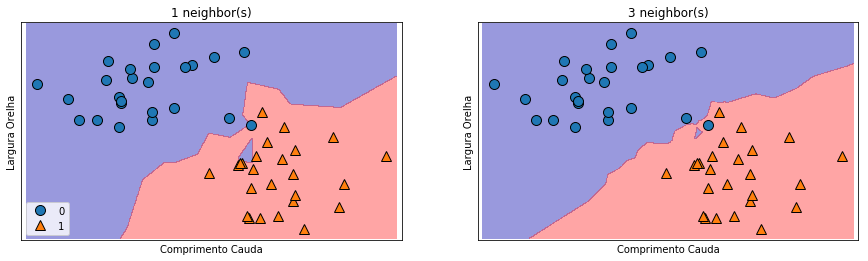

In [109]:
import mglearn

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(poke_data.values, poke_target.values)
    mglearn.plots.plot_2d_separator(clf, poke_data_test.values, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(poke_data_test.values[:, 0], poke_data_test.values[:, 1], poke_target_test.values, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Comprimento Cauda")
    ax.set_ylabel("Largura Orelha")
axes[0].legend(loc=3)

Pelos gráficos, parece que se n_neighbors=1 o algoritmo está mais próximo de identificar corretamente todos os samples. Note que este algoritmo faz algo mais poderoso do que simplesmente traçar uma reta para dividir os datapoints, ele divide o gráfico em regiões diferentes onde habitam os pontos de cada classe.

In [110]:
# verificando com o algoritmo LogisticRegression
log.fit(poke_data, poke_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
poke_score_log = log.score(poke_data_test,poke_target_test)
print(poke_score_log)

0.96


In [112]:
poke_predict_log = log.predict(poke_data_test)
print('Previsto para os 10 primeiros samples:',poke_predict_log[:20])
print('Classe real dos 10 primeiros samples: ',poke_target_test.values[:20])

Previsto para os 10 primeiros samples: [0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0]
Classe real dos 10 primeiros samples:  [0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0]


Confusion matrix, without normalization


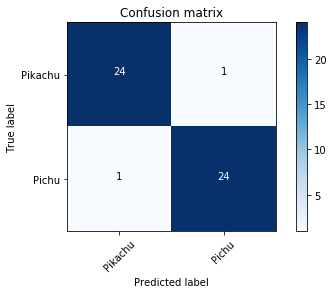

In [113]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(poke_predict_log,poke_target_test)
plot_confusion_matrix(cm2, ['Pikachu','Pichu'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues) 

Para finalizar vamos verificar a decision boundary para LogisticRegression dois valores para o seu parâmetro C (veremos mais tarde o seu significado).

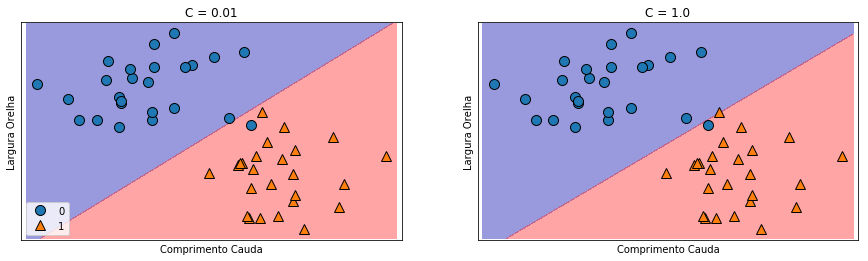

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
for C, ax in zip([0.01,1.], axes):
    clf = LogisticRegression(C=C).fit(poke_data.values, poke_target.values)
    mglearn.plots.plot_2d_separator(clf, poke_data_test.values, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(poke_data_test.values[:, 0], poke_data_test.values[:, 1], poke_target_test.values, ax=ax)
    ax.set_title("C = {}".format(C))
    ax.set_xlabel("Comprimento Cauda")
    ax.set_ylabel("Largura Orelha")
axes[0].legend(loc=3)

O resultado com este algoritmo foi diferente, ele usa uma reta, mas isso não significa que o KNeighborsClassifier sempre será melhor que  LogisticRegression. Cada problema é único e devemos testar vários algoritmos afim de determinar qual especifica um modelo melhor.<br>

Este exemplo foi bem simples, agora é hora de nos aprofundarmos em problemas mais complexos onde precisaremos de mais ferramentas para fazer boas previsões bem como outros algoritmos.